In [8]:
#Importing Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.datasets import load_files
from tensorflow.python.keras.utils import np_utils

In [9]:
train_dir = 'NEU Metal Surface Defects Data/train'
val_dir = 'NEU Metal Surface Defects Data/valid'
test_dir='NEU Metal Surface Defects Data/test'
print("Path: ",os.listdir("NEU Metal Surface Defects Data"))
print("Train: ",os.listdir("NEU Metal Surface Defects Data/train"))
print("Test: ",os.listdir("NEU Metal Surface Defects Data/test"))
print("Validation: ",os.listdir("NEU Metal Surface Defects Data/valid"))

Path:  ['test', 'train', 'valid']
Train:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [10]:
# print("Inclusion Defect")
# print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
# print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
# print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

dirs = os.listdir(train_dir)
train_images = 0;
val_images = 0;
test_images = 0;
for dir in dirs:
    print(dir+" Defects->")
    print("Training Images:", len(os.listdir(train_dir+'/'+dir)))
    train_images += len(os.listdir(train_dir+'/'+dir))
    print("Validation Images:", len(os.listdir(val_dir+'/'+dir)))
    val_images += len(os.listdir(val_dir+'/'+dir))
    print("Testing Images:", len(os.listdir(test_dir+'/'+dir)))
    test_images += len(os.listdir(test_dir+'/'+dir))

print("Total Training set images: ", train_images)
print("Total Validation set images: ", val_images)
print("Total Testing set images: ", test_images)

Crazing Defects->
Training Images: 276
Validation Images: 12
Testing Images: 12
Inclusion Defects->
Training Images: 276
Validation Images: 12
Testing Images: 12
Patches Defects->
Training Images: 276
Validation Images: 12
Testing Images: 12
Pitted Defects->
Training Images: 276
Validation Images: 12
Testing Images: 12
Rolled Defects->
Training Images: 276
Validation Images: 12
Testing Images: 12
Scratches Defects->
Training Images: 276
Validation Images: 12
Testing Images: 12
Total Training set images:  1656
Total Validation set images:  72
Total Testing set images:  72


In [11]:
img_size = 180
batch = 32

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                       seed=123,
                                                       batch_size=batch,
                                                       image_size=(img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                       seed=123,
                                                       batch_size=batch,
                                                       image_size=(img_size, img_size))

Found 1656 files belonging to 6 classes.
Found 72 files belonging to 6 classes.


In [12]:
defect_name = train_ds.class_names
defect_name

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

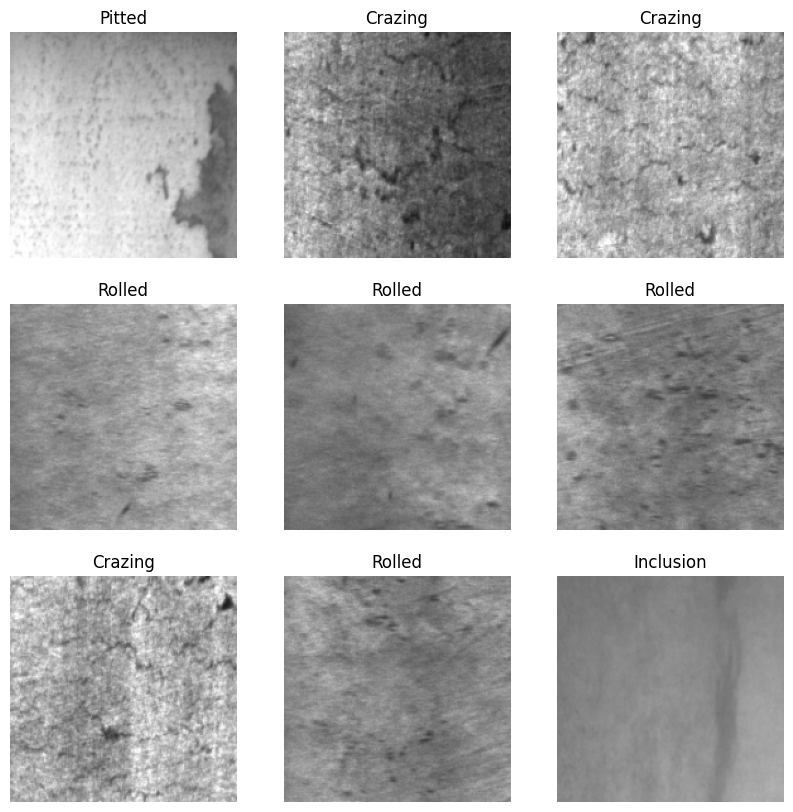

In [14]:
plt.figure(figsize=(10, 10))

i = 0
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(defect_name[labels[i]])
        plt.axis('off')

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [17]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [18]:
#Data Augmentation

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


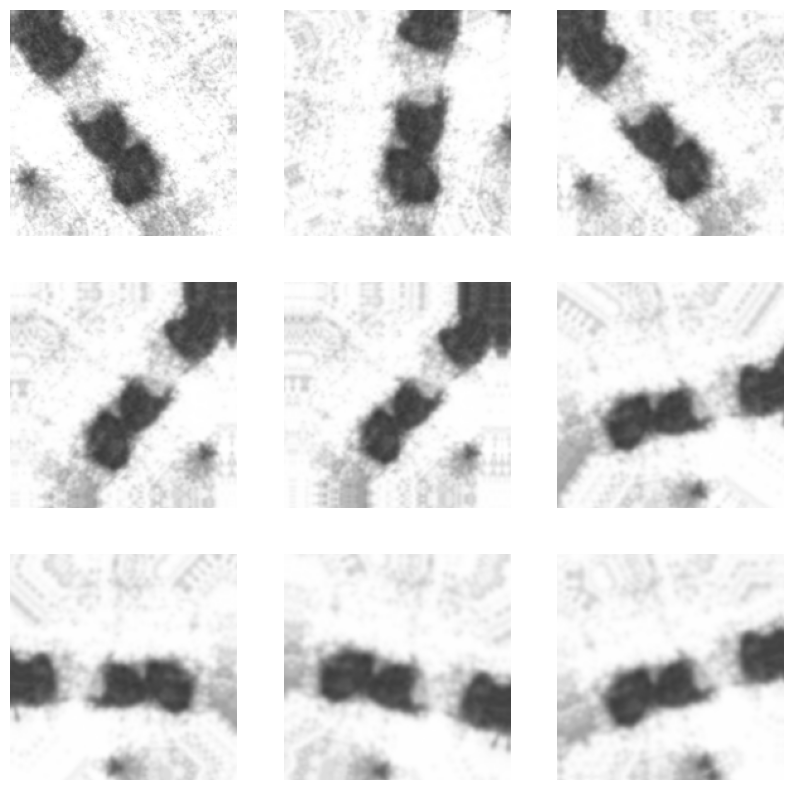

In [19]:
i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [20]:
#Model Creation

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

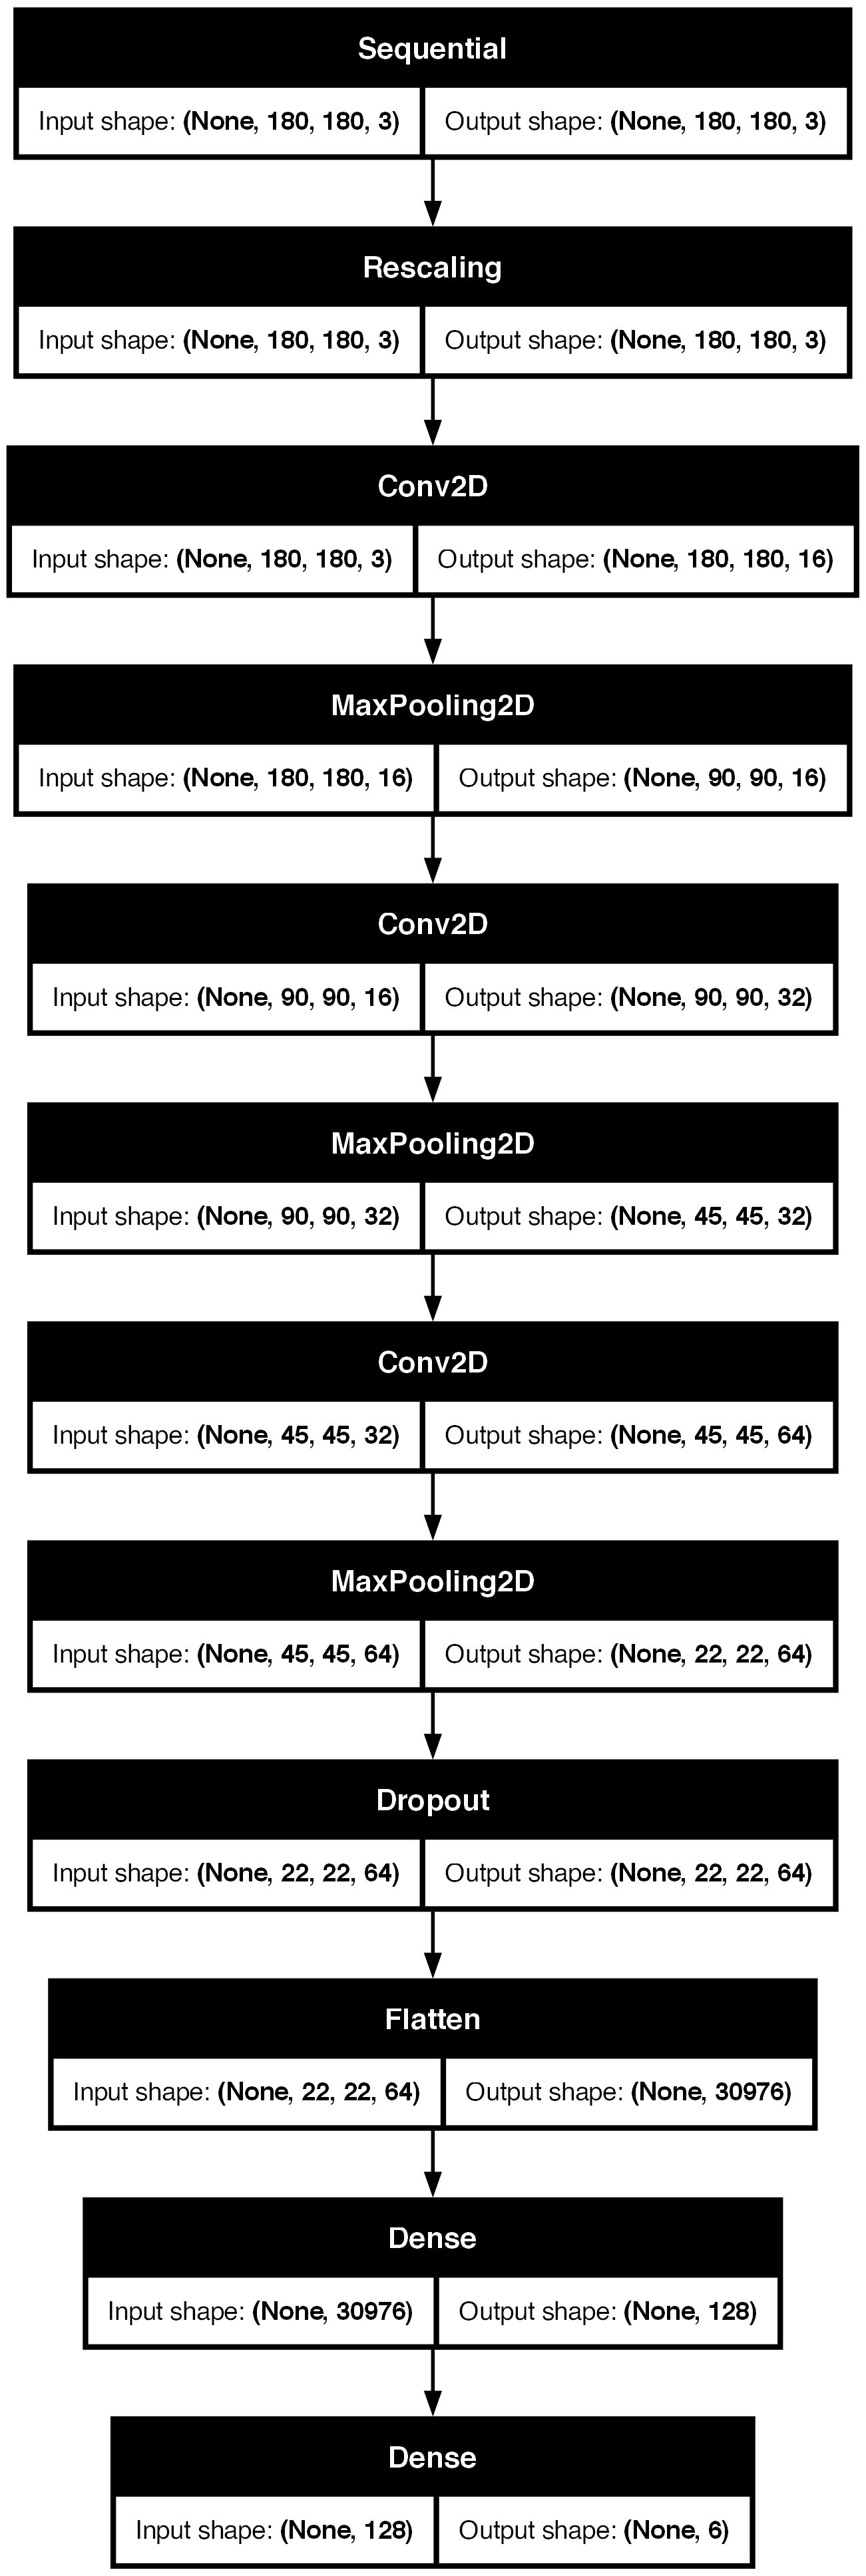

In [22]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True)

In [28]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.1728 - loss: 2.0301 - val_accuracy: 0.1667 - val_loss: 1.6879
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.3987 - loss: 1.4823 - val_accuracy: 0.6528 - val_loss: 1.0381
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.6702 - loss: 0.9082 - val_accuracy: 0.8333 - val_loss: 0.5234
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.7916 - loss: 0.6060 - val_accuracy: 0.8611 - val_loss: 0.6584
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.7635 - loss: 0.7192 - val_accuracy: 0.8333 - val_loss: 0.4817
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.8532 - loss: 0.4465 - val_accuracy: 0.9306 - val_loss: 0.2396
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.8809 - loss: 0.3283 - val_accuracy: 0.8194 - val_loss: 0.9644
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.8747 - loss: 0.3823 - val_accu

In [29]:
#Checking the prediction capability
# input_image = tf.keras.utils.load_img("NEU Metal Surface Defects Data/test/Rolled/RS_1.bmp", target_size=(180,180))
# input_image_array = tf.keras.utils.img_to_array(input_image)
# input_image_exp_dim = tf.expand_dims(input_image_array,0)

# predictions = model.predict(input_image_exp_dim)
# result = tf.nn.softmax(predictions[0])
# defect_name[np.argmax(result)]

def classify_defect(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image is of ' + defect_name[np.argmax(result)] + ' defect with a score of '+ str(np.max(result)*100)
    return outcome

In [30]:
classify_defect('NEU Metal Surface Defects Data/test/Patches/Pa_101.bmp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


'The Image is of Patches defect with a score of 100.0'

In [31]:
model.save('Surface_Defect_Detection_Model.h5')

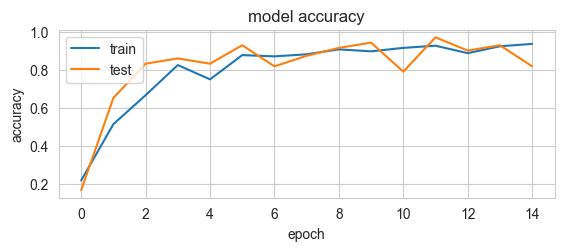

In [32]:
sns.set_style("whitegrid")
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

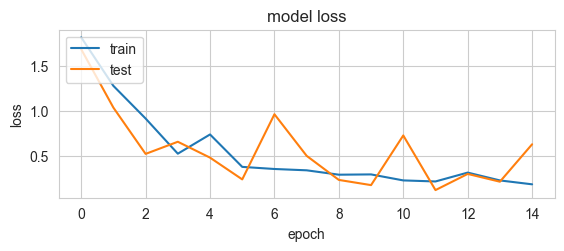

In [33]:
sns.set_style("whitegrid")
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')  
plt.show()